# No Man's Sky Updates Analysis

## Table of Contents
1. [Introduction](#Introduction)
2. [Data Description](#Data-Description)

## Introduction
The purpose of this analysis is to:
- Examine the frequency and patterns of updates for No Man's Sky.
- Provide insights into the development cycle.
- Help predict future updates.
- Identify periods of high and low activity for planning game events or releases.

## Data Description
The dataset includes:
- Dates and descriptions of each update.
- Data collected from official No Man's Sky update logs.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import calendar
import re

# Display plots inline
%matplotlib inline

In [2]:
# Raw data pulled from https://www.nomanssky.com/release-log/
raw_text_data = """
Beyond Update 2.0 - August 14, 2019 
Beyond Patch 2.04 - August 15, 2019.
Beyond Patch 2.05 - August 15, 2019.
Beyond Patch 2.06 - August 15, 2019.
Beyond Patch 2.07 - August 20, 2019.
Beyond Patch 2.08 - August 21, 2019.
Beyond Patch 2.09 - August 22, 2019.
Beyond Patch 2.09.1 - August 23, 2019.
Beyond Patch 2.09.2 - August 28, 2019.
Beyond Patch 2.09.3 - August 30, 2019.
Beyond Patch 2.09.4 - September 3, 2019.
Beyond Patch 2.09.4 Hotfix - September 4, 2019.
Beyond Patch 2.11 - September 5, 2019.
Beyond Patch 2.12 - September 18, 2019.
Beyond Patch 2.13 - October 3, 2019.
Beyond Patch 2.14 - October 10, 2019.
Beyond Patch 2.15 - October 30, 2019.
Beyond Patch 2.16 - November 7, 2019.
Synthesis Update 2.2 - November 28, 2019 
Synthesis Patch 2.22 - November 29, 2019.
Synthesis Patch 2.23 - December 4, 2019.
Synthesis Patch 2.24 - December 16, 2019.
Synthesis Patch 2.26 - January 22, 2020.
Synthesis Patch 2.27 - February 4, 2020.
Living Ship Update 2.3 - Februray 19, 2020.
Living Ship Patch 2.31 - February 21, 2020.
Living Ship Patch 2.32 - February 27, 2020.
Living Ship Patch 2.33 - March 12, 2020.
Living Ship Patch 2.34 - March 31, 2020.
Exo Mech Update 2.4 - April 7, 2020.
Exo Mech Patch 2.41 - April 8, 2020.
Exo Mech Patch 2.42 - April 16, 2020.
Cross Play Update 2.5 - June 10, 2020.
Crossplay Patch 2.52 - June 12, 2020.
Crossplay Patch 2.53 - June 16, 2020.
Crossplay Patch 2.54 - June 18, 2020.
Crossplay Patch 2.55 - June 26, 2020.
Desolation Update 2.6 - July 16, 2020.
Desolation Patch 2.61 - July 22, 2020.
Desolation Patch 2.62 - August 12, 2020.
Origins Update 3.0 - September 23, 2020.
Origins Patch 3.01 - September 24, 2020.
Origins Patch 3.02 - September 29, 2020.
Origins Patch 3.03 - October 9, 2020.
Halloween Holiday Update 3.05 - October 26, 2020.
Next Generation Update 3.10 October 28, 2020.
Next Generation Patch 3.12 - November 25, 2020.
Next Generation Patch 3.13 - November 30, 2020.
Next Generation Patch 3.15 - January 27, 2021.
Companions Update 3.2 - Februray 17, 2021.
Companions Patch 3.21 - February 19,2021.
Companions Patch 3.22 - February 26, 2021.
Expeditions Update 3.3 March 31, 2021.
Expeditions Patch 3.32 - April 1, 2021.
Expeditions Patch 3.33 - April 1, 2021.
Expeditions Patch 3.34 - April 5, 2021.
Expeditions Patch 3.35 - April 7, 2021.
Expeditions Patch 3.37 - April 15, 2021.
Expeditions Patch 3.38 - April 30, 2021.
Expedition Patch 3.40 - May 17, 2021.
Expedition Patch 3.41 - May 21, 2021.
Expedition Patch 3.42 - May 21, 2021.
Prisms Update 3.5 - June 2, 2021.
Prisms Patch 3.51 - June 4, 2021.
Prisms Patch 3.52 - June 10, 2021.
Prisms Patch 3.53 - June 16, 2021.
Frontiers Update 3.6 - September 1, 2021.
Frontiers Patch 3.61 - September 2, 2021.
Frontiers Patch 3.62 - September 3, 2021.
Frontiers Patch 3.63 - September 6, 2021.
Frontiers Patch 3.64 - September 8, 2021.
Frontiers Patch 3.65 - September 8, 2021.
Frontiers Patch 3.66 - September 13, 2021.
Frontiers Patch 3.67 - September 16, 2021.
Frontiers Patch 3.68 - September 30, 2021.
Emergence Update 3.70 - October 20, 2021.
Emergence Patch 3.71 - October 28, 2021.
Expeditions Revisited Patch 3.73 - November 24, 2021.
Expeditions Revisited Patch 3.74 - November 26, 2021.
Expeditions Revisited Patch 3.75 - December 3, 2021
Sentinel Update 3.8 - Februray 16, 2022.
Sentinel Patch 3.81 - February 18, 2022.
Sentinel Patch 3.82 - February 22, 2022.
Sentinel Patch 3.84 - March 1, 2022.
Outlaws Update 3.85 - April 13, 2022.
Outlaws Patch 3.87 - April 19, 2022.
Outlaws Patch 3.88 - April 22, 2022.
Outlaws Patch 3.89 - May 3, 2022.
Leviathan Update 3.90 - May 25, 2022.
Leviathan Patch 3.91 - May 31, 2022.
Leviathan Patch 3.92 - June 13, 2022.
Leviathan Patch 3.93 - June 17, 2022.
Endurance Update 3.94 - July 20, 2022.
Endurance Patch 3.95 - July 22, 2022.
Endurance Patch 3.96 - July 22, 2022.
Endurance Patch 3.97 - July 27, 2022.
Endurance Patch 3.98 - July 31, 2022.
Endurance Patch 3.99 - August 19, 2022.
WayPoint Update 4.0 - October 7, 2022.
Waypoint Patch 4.0.3 - October 20, 2022.
Waypoint Patch 4.03 - October 8, 2022.
Waypoint Patch 4.04 - October 15, 2022.
Waypoint Patch 4.05 - October 21, 2022.
Waypoint Patch 4.06 - November 8, 2022.
Waypoint Holiday 4.07 - November 23, 2022.
Waypoint Holiday 4.08 - December 6, 2022.
Fractal Update 4.1 - February 22, 2023.
Fractal Patch 4.12 - March 1, 2023.
Fractal Patch 4.13 - March 8, 2023.
Fractal Patch 4.14 - March 10, 2023.
Fractal Patch 4.15 - March 16, 2023.
Interceptor Update 4.2 - Februray 22, 2023.
Interceptor Patch 4.21 - April 6, 2023.
Interceptor Patch 4.22 - April 14, 2023.
Interceptor Patch 4.23 - April 17, 2023.
Singularity Update 4.30 - June 7, 2023.
Singularity Patch 4.30.1 - June 08, 2023.
Singularity Patch 4.30.2 - June 8, 2023.
Singularity Patch 4.30.3 - June 9, 2023.
Singularity Patch 4.33 - June 13, 2023.
Singularity Patch 4.34 - June 16, 2023.
Singularity Patch 4.35 - June 17, 2023.
Singularity Patch 4.36 - June 19, 2023.
Singularity Patch 4.37 - July 13, 2023.
Singularity Patch 4.38 - July 20, 2023.
Echoes Update 4.4 - August 24, 2023.
Echoes Patch 4.41 - August 25, 2023.
Echoes Patch 4.42 - August 29, 2023.
Echoes Patch 4.43 - August 30, 2023.
Echoes Patch 4.44 - September 7, 2023.
Echoes Patch 4.45 - September 18, 2023.
Holiday 2023 Expeditions 4.46 - December 8, 2023.
Holiday Expeditions 2023 4.46.2 - December 13, 2023.
Holiday Expeditions 2023 4.47 - December 14, 2023.
Holiday Expeditions 2023 4.48 - January 3, 2024.
Omega Update 4.5 - February 15, 2024.
Omega Patch 4.51 - February 15, 2024.
Omega Patch 4.52 - February 27, 2024.
Orbital Update 4.6 - March 27, 2023.
Orbitals Patch 4.61 - March 27, 2024.
Orbitals Patch 4.62 - March 27, 2024.
Orbitals Patch 4.63 - March 29, 2024.
Orbitals Patch 4.64 - April 9, 2024.
Orbitals Patch 4.65 - May 1, 2024.
Adrift Update 4.7 - May 29, 2024.
Adrift Patch 4.71 - May 31, 2024.
Adrift Patch 4.72 June 4, 2024.
Worlds Part 1 Update 5.0 - July 17, 2024.
Worlds Part 1 Patch 5.00.1 - July 19, 2024.
Worlds Part 1 Patch 5.01 - July 22, 2024.
Worlds Part 1 Patch 5.01.1 - July 23, 2024.
Worlds Part 1 Patch 5.02 - July 25, 2024.
Worlds Part 1 Patch 5.03 - July 29, 2024.
"""
# Parse raw text data
raw_data = []
pattern = re.compile(r"(.+?) - (.+?)$")
errors = []

# Correcting common typos in dates
raw_text_data = raw_text_data.replace('Februray', 'February')

for line in raw_text_data.strip().split('\n'):
    match = pattern.search(line)
    if match:
        title, date = match.groups()
        category = "Update" if "Update" in title else "Patch"
        if "Holiday" in title:
            category = "Holiday"
        date = date.strip('.').strip()  # Remove trailing periods and extra spaces
        date = re.sub(r'(\d{1,2}),(\d{4})', r'\1, \2', date)
        try:
            date = datetime.strptime(date, '%B %d, %Y').strftime('%Y-%m-%d')
        except ValueError as e:
            errors.append((date, str(e)))
            date = None
    else:
        title = line
        date = None
        category = "Update" if "Update" in title else "Patch"
        if "Holiday" in title:
            category = "Holiday"
    raw_data.append({"Category": category, "Title": title, "Date": date})

# Print errors for debugging
print("Date parsing errors:", errors)

# Convert parsed data to DataFrame
noman_update_data = pd.DataFrame(raw_data)

# Convert 'Date' column to datetime
noman_update_data['Date'] = pd.to_datetime(noman_update_data['Date'], errors='coerce')

# Display the first few rows to ensure the data is loaded correctly
display(noman_update_data.head())
display(noman_update_data.tail())

Date parsing errors: []


,Category,Title,Date
0,Update,Beyond Update 2.0,2019-08-14
1,Patch,Beyond Patch 2.04,2019-08-15
2,Patch,Beyond Patch 2.05,2019-08-15
3,Patch,Beyond Patch 2.06,2019-08-15
4,Patch,Beyond Patch 2.07,2019-08-20


,Category,Title,Date
148,Patch,Worlds Part 1 Patch 5.00.1,2024-07-19
149,Patch,Worlds Part 1 Patch 5.01,2024-07-22
150,Patch,Worlds Part 1 Patch 5.01.1,2024-07-23
151,Patch,Worlds Part 1 Patch 5.02,2024-07-25
152,Patch,Worlds Part 1 Patch 5.03,2024-07-29


In [3]:
# Filter data from August 2019 onwards
filtered_data = noman_update_data[noman_update_data['Date'] >= '2019-08-01']

# Display the filtered data
display(filtered_data.head())
display(filtered_data.tail())

,Category,Title,Date
0,Update,Beyond Update 2.0,2019-08-14
1,Patch,Beyond Patch 2.04,2019-08-15
2,Patch,Beyond Patch 2.05,2019-08-15
3,Patch,Beyond Patch 2.06,2019-08-15
4,Patch,Beyond Patch 2.07,2019-08-20


,Category,Title,Date
148,Patch,Worlds Part 1 Patch 5.00.1,2024-07-19
149,Patch,Worlds Part 1 Patch 5.01,2024-07-22
150,Patch,Worlds Part 1 Patch 5.01.1,2024-07-23
151,Patch,Worlds Part 1 Patch 5.02,2024-07-25
152,Patch,Worlds Part 1 Patch 5.03,2024-07-29


In [11]:
# Ensure Holiday updates are correctly classified
filtered_data.loc[:, 'Group'] = filtered_data['Category'].apply(lambda x: 'Holiday' if x == 'Holiday' else ('Update' if x == 'Update' else 'Patch'))
filtered_data.loc[:, 'Update_Group'] = ((filtered_data['Group'] == 'Update') | (filtered_data['Group'] == 'Holiday')).cumsum()

# Assign update titles to patches
filtered_data.loc[:, 'Update_Title'] = filtered_data.apply(lambda x: x['Title'] if x['Group'] in ['Update', 'Holiday'] else None, axis=1)
filtered_data.loc[:, 'Update_Title'] = filtered_data['Update_Title'].ffill()

# Count patches per update and include holiday patches
patch_counts = filtered_data[filtered_data['Group'] == 'Patch'].groupby('Update_Title').size().reset_index(name='Patch_Count')

# Correct patch counts for holiday updates by summing them
holiday_updates = filtered_data[filtered_data['Group'] == 'Holiday']['Title'].tolist()
total_holiday_patches = filtered_data[(filtered_data['Group'] == 'Patch') & (filtered_data['Update_Title'].isin(holiday_updates))].shape[0]

# Adjust holiday patch count in the patch_counts DataFrame
if not patch_counts.empty:
    patch_counts.loc[patch_counts['Update_Title'].isin(holiday_updates), 'Patch_Count'] = total_holiday_patches

# Merge patch counts with update data
update_data = filtered_data[filtered_data['Group'] != 'Patch'].merge(patch_counts, left_on='Title', right_on='Update_Title', how='left')

# Assign total_holiday_patches to all Holiday updates in the merged DataFrame
update_data.loc[update_data['Group'] == 'Holiday', 'Patch_Count'] = total_holiday_patches

# Display the data with patch counts using Pandas methods
print(update_data.head())
print(update_data.tail())

  Category                   Title       Date   Group  Update_Group  \
0   Update       Beyond Update 2.0 2019-08-14  Update             1   
1   Update    Synthesis Update 2.2 2019-11-28  Update             2   
2   Update  Living Ship Update 2.3 2020-02-19  Update             3   
3   Update     Exo Mech Update 2.4 2020-04-07  Update             4   
4   Update   Cross Play Update 2.5 2020-06-10  Update             5   

           Update_Title_x          Update_Title_y  Patch_Count  
0       Beyond Update 2.0       Beyond Update 2.0         17.0  
1    Synthesis Update 2.2    Synthesis Update 2.2          5.0  
2  Living Ship Update 2.3  Living Ship Update 2.3          4.0  
3     Exo Mech Update 2.4     Exo Mech Update 2.4          2.0  
4   Cross Play Update 2.5   Cross Play Update 2.5          4.0  
   Category                          Title       Date    Group  Update_Group  \
26  Holiday  Holiday Expeditions 2023 4.48 2024-01-03  Holiday            27   
27   Update            

In [12]:
# Clean the DataFrame by dropping redundant columns and renaming them for clarity
update_data = update_data.drop(columns=['Update_Title_y']).rename(columns={'Update_Title_x': 'Update_Title'})

# Display the cleaned data with patch counts
display(update_data.head())
display(update_data.tail())

,Category,Title,Date,Group,Update_Group,Update_Title,Patch_Count
0,Update,Beyond Update 2.0,2019-08-14,Update,1,Beyond Update 2.0,17.0
1,Update,Synthesis Update 2.2,2019-11-28,Update,2,Synthesis Update 2.2,5.0
2,Update,Living Ship Update 2.3,2020-02-19,Update,3,Living Ship Update 2.3,4.0
3,Update,Exo Mech Update 2.4,2020-04-07,Update,4,Exo Mech Update 2.4,2.0
4,Update,Cross Play Update 2.5,2020-06-10,Update,5,Cross Play Update 2.5,4.0


,Category,Title,Date,Group,Update_Group,Update_Title,Patch_Count
26,Holiday,Holiday Expeditions 2023 4.48,2024-01-03,Holiday,27,Holiday Expeditions 2023 4.48,3.0
27,Update,Omega Update 4.5,2024-02-15,Update,28,Omega Update 4.5,2.0
28,Update,Orbital Update 4.6,2023-03-27,Update,29,Orbital Update 4.6,5.0
29,Update,Adrift Update 4.7,2024-05-29,Update,30,Adrift Update 4.7,1.0
30,Update,Worlds Part 1 Update 5.0,2024-07-17,Update,31,Worlds Part 1 Update 5.0,5.0


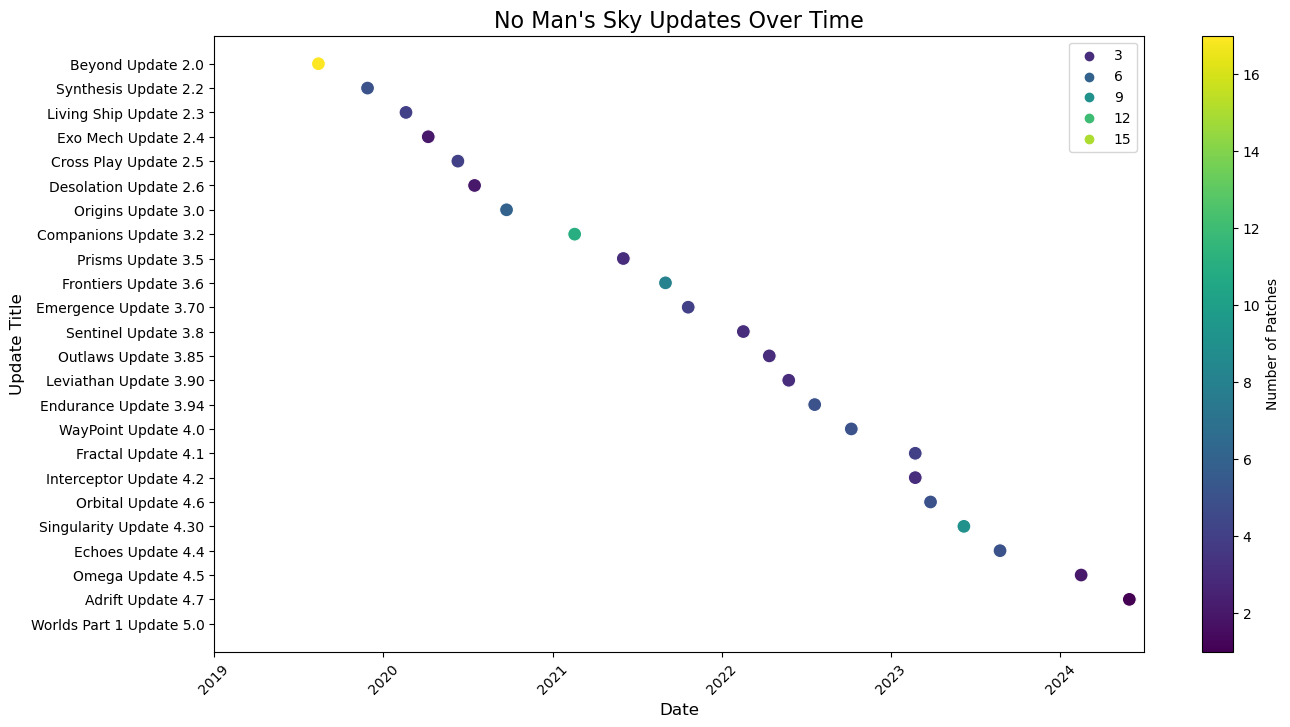

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta

# Ensure your data is sorted by date
update_data = update_data.sort_values('Date')

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(15, 8))

# Create the scatter plot
scatter = sns.scatterplot(data=update_data, 
                          x='Date', 
                          y='Update_Title', 
                          hue='Patch_Count', 
                          palette='viridis',
                          s=100,
                          ax=ax)

# Customize the plot
ax.set_title('No Man\'s Sky Updates Over Time', fontsize=16)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Update Title', fontsize=12)
plt.xticks(rotation=45)

# Adds colorbar legend
norm = plt.Normalize(update_data['Patch_Count'].min(), update_data['Patch_Count'].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, label="Number of Patches")
cbar.ax.tick_params(labelsize=10)

# Remove the automatic legend
ax.get_legend().remove()

# Set x-axis limits to include full 2019
start_date = datetime(2019, 1, 1)
end_date = datetime(2024, 6, 30)
ax.set_xlim(start_date, end_date)

# Add legend
ax.legend()

plt.show()